<a href="https://colab.research.google.com/github/Arunima6688/dataAnalysis/blob/main/Iris_Self_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Iris Data**

**Introduction**

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

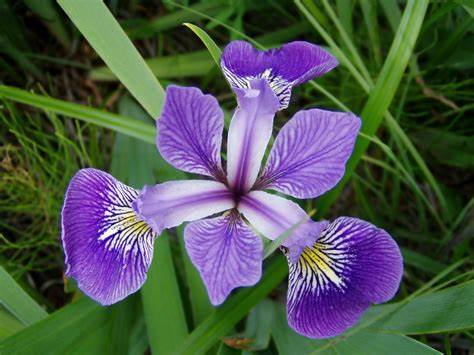

**About the data**

Id: unique id

SL: length of sepal in cm

SW: width of sepal in cm

PL: length of petal in cm

PW: Width of petal in cm

classification:name of species

**Import Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


1. Do an initial research on the dataset given below and try to do the initial steps
like we did on our previous project.
https://www.kaggle.com/datasets/uciml/iris

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/iris.csv")

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Do the following things compulsorily, you can add your own data analysis and
preprocessing.

a. Check for missing data.

Handling Null values

In [ ]:
data.isnull().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


 There is no null values in the dataset. there is no need of handing null values

c. Print Statistical summary using the description.

In [ ]:
data.shape

(150, 5)

b. Print the dimension of the dataset

In [ ]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


d. Print the range of the SepalLengthCm

In [ ]:
sepal_length_range = data['SL'].max() - data['SL'].min()
sepal_length_range

3.6000000000000005

e. Print the range of the SepalWidthCm

In [ ]:
sepal_width_range=data['SW'].max()-data['SW'].min()
sepal_width_range

2.4000000000000004


f. Print the range of the PetalLengthCm


In [ ]:
petal_length_range=data['PL'].max()-data['PL'].min()
petal_length_range

5.9


g. Print the range of the PetalWidthCm

In [ ]:
petal_width_range=data['PW'].max()-data['PW'].min()
petal_width_range

2.4

3. Is this a classification or regression problem? Explain?

  The Iris dataset is a classification problem. It contains labeled data (species of iris flowers) that need to be predicted based on the input features such as sepal and petal dimensions. The task is to classify the observations into one of three classes: Iris-setosa, Iris-versicolor, and Iris-virginica. Since the output is categorical (discrete classes), it is a classification problem

1. Do all proper data preprocessing.

In [ ]:
data['Classification'].value_counts()

,count
Classification,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
iris_data = data.replace({'Classification': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})


<ipython-input-19-a8a3f098f91c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_data = data.replace({'Classification': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})


In [ ]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


2. Do all the data visualization you think necessary.
3. Write down all the conclusions you derived from the data.

**EDA**

In [ ]:
iris_data.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.109369,0.871754,0.817954,0.782561
SW,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PL,0.871754,-0.420516,1.000000,0.962757,0.949043
PW,0.817954,-0.356544,0.962757,1.000000,0.956464
Classification,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

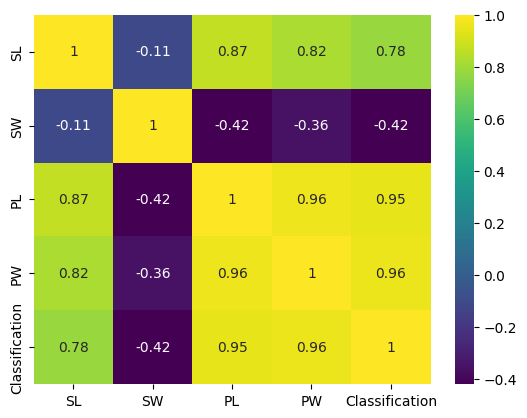

In [ ]:
sns.heatmap(iris_data.corr(),cmap="viridis",annot=True)

<ipython-input-31-5a27b9111a74>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


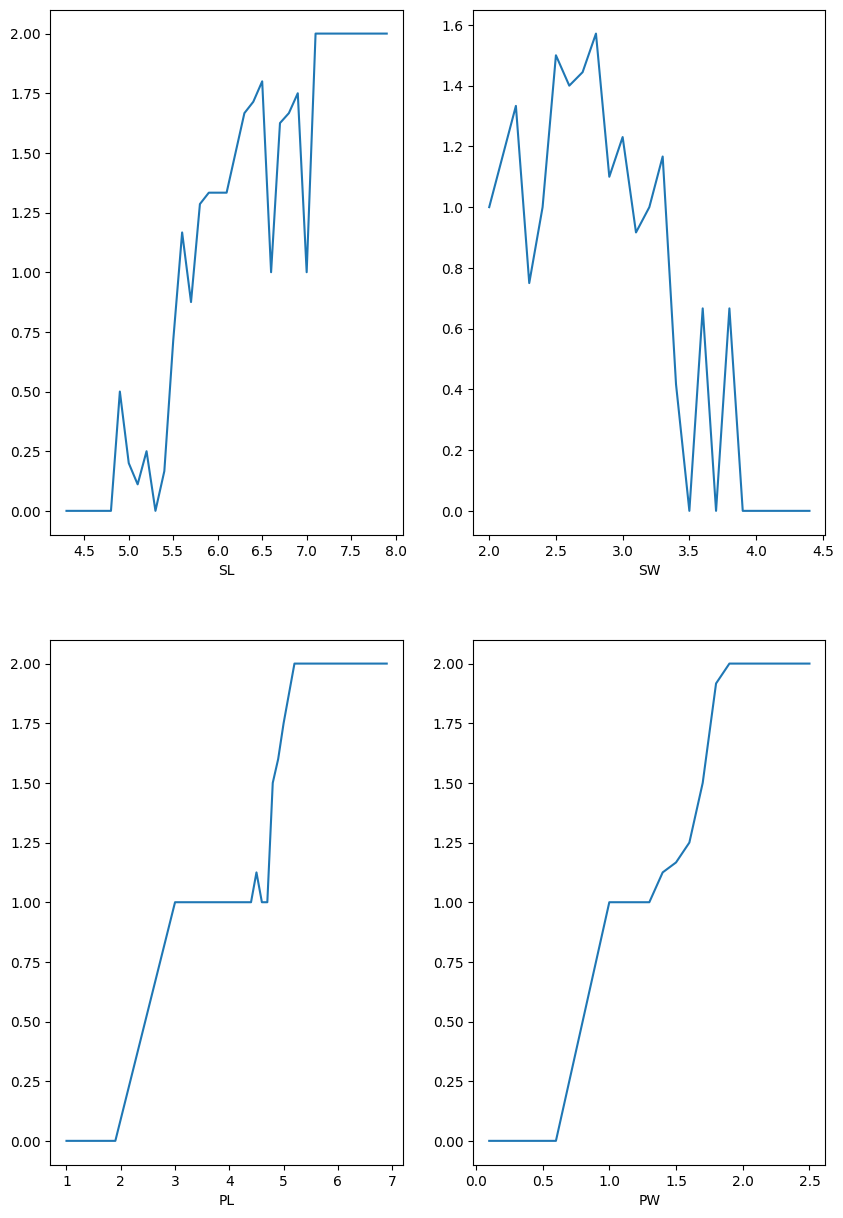

In [ ]:
features=['SL','SW','PL','PW']
plt.subplots(figsize=(10,15))
for i,col in enumerate  (features):
  plt.subplot(2,2,i+1)
  iris_data.groupby(col).mean()['Classification'].plot()
plt.show()



<Axes: xlabel='Classification', ylabel='count'>

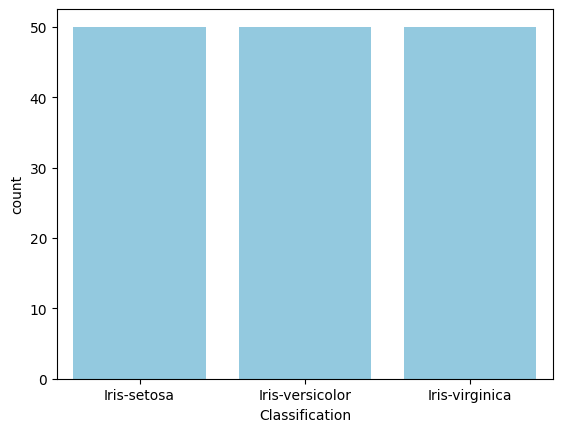

In [ ]:
sns.countplot(data=data,x="Classification",color="skyblue")

<Axes: xlabel='PL', ylabel='Count'>

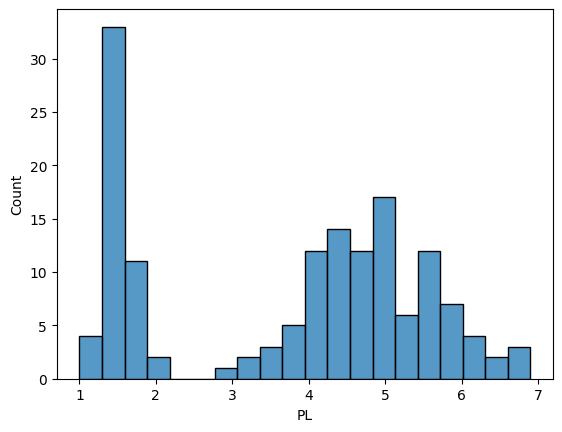

In [ ]:
sns.histplot(data["PL"],bins=20)

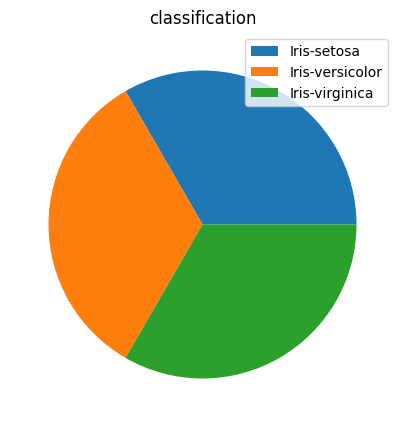

In [ ]:
plt.figure(figsize=(6, 5))
plt.pie(data['Classification'].value_counts())
plt.title('classification')
plt.legend(data['Classification'].value_counts().index.tolist())

<Axes: xlabel='SL', ylabel='count'>

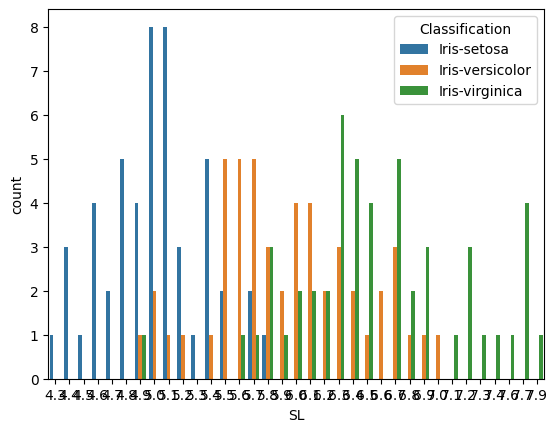

In [ ]:
sns.countplot(data=data,x='SL',hue='Classification')

<Axes: xlabel='SL', ylabel='SW'>

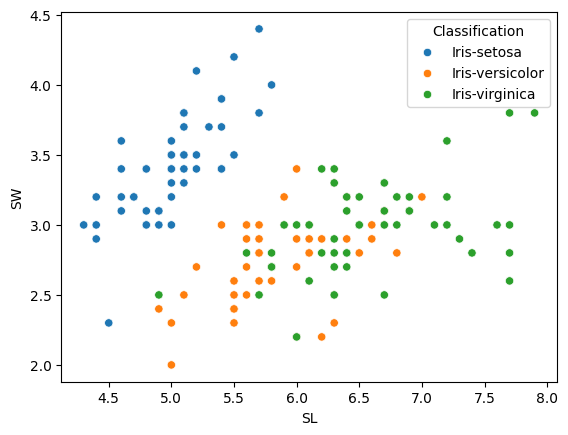

In [ ]:
sns.scatterplot(data=data,x="SL",y="SW",hue="Classification")

**Modeling**

    Classification

In [ ]:
X=iris_data.drop( columns=["Classification"])
X

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Y=iris_data["Classification"]
Y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("Y_train shape",Y_train.shape)
print("Y_test shape",Y_test.shape)

X_train shape (105, 4)
X_test shape (45, 4)
Y_train shape (105,)
Y_test shape (45,)


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)

In [ ]:
accuracy_score(Y_train,X_train_prediction)*100

98.09523809523809

In [ ]:
X_test_prediction=model.predict(X_test)

In [ ]:
accuracy_score(Y_test,X_test_prediction)*100

97.77777777777777